2023-02-10 14:57:38,701 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=3.95e-9
2023-02-10 14:57:38,941 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 3.9524528280249685e-09, best pos: [2.47664065e-05 4.12735463e-05]
2023-02-10 14:57:43,264 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2023-02-10 14:57:43,267 - matplotlib.animation - INFO - MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 1000x800 -pix_fmt rgba -r 12.5 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y animation.mp4
2023-02-10 14:58:04,831 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2023-02-10 14:58:04,834 - matplotlib.animation - INFO - MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 1000x800 -pix_fmt rgba -r 12.5 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /tmp/tmppi13tyj7/temp.m4v


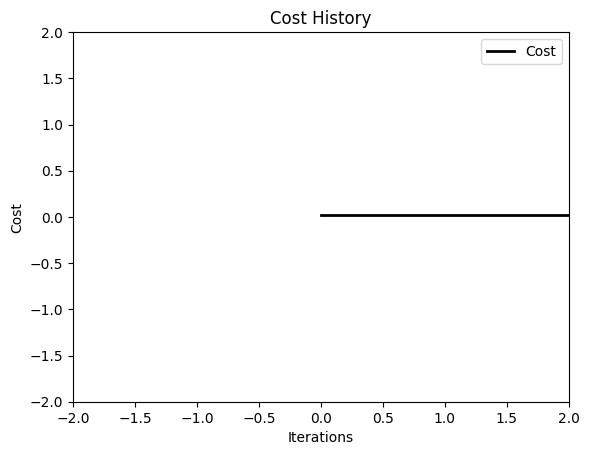

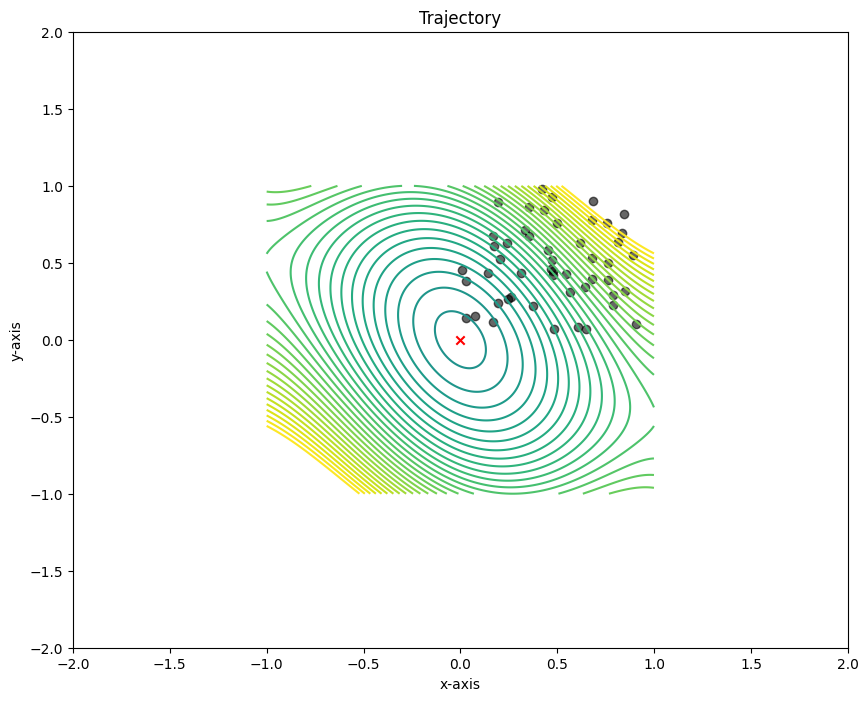

In [37]:
# Import modules
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation, rc
from IPython.display import HTML

# Import PySwarms
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
from pyswarms.utils.plotters import (plot_cost_history, plot_contour, plot_surface)

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

xmin = -2
xmax =  2
ymin = -2
ymax =  2

options = {'c1':0.5, 'c2':0.3, 'w':0.9}
optimizer = ps.single.GlobalBestPSO(n_particles=50, dimensions=2, options=options)
cost, pos = optimizer.optimize(fx.threehump, iters=100)

ax = plt.gca()
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])


plot_cost_history(cost_history=optimizer.cost_history, ax=ax)


# equivalent to rcParams['animation.html'] = 'html5'
# See http://louistiao.me/posts/notebooks/save-matplotlib-animations-as-gifs/
rc('animation', html='html5')

from pyswarms.utils.plotters.formatters import Mesher
               
# Initialize mesher with three hump
m = Mesher(func=fx.threehump)

format_options = { 'c': 'red'}

# Make animation
# allegedly this is where we can style the plot by passing additional arguments to matplotlib.ax via **kwargs 
# but I keep getting exceptions complaining about double set values
animation = plot_contour(pos_history=optimizer.pos_history,
                         mesher=m,
                         mark=(0,0))

# Set axis range
plt.xlim([xmin, xmax])
plt.ylim([xmin, xmax])

animation.save('animation.mp4')

# Enables us to view it in a Jupyter notebook
HTML(animation.to_html5_video())


